# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

## .loc[ ] indexing

In [1]:
import pandas as pd

In [2]:
# Here we create a sample dataframe
sample_df = pd.DataFrame({"column 1": [20,50,15,50,65,50,10], "column 2": [0,1,1,1,0,0,1]})
sample_df

,column 1,column 2
0,20,0
1,50,1
2,15,1
3,50,1
4,65,0
5,50,0
6,10,1


You can use the .loc index method to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from column 1 that have a value of 0 in column 2.

Run the code below to see how this works.

In [3]:
# This code selects all values from column 1 where the value on that same row in column 2 is equal to 0
sample_df["column 1"].loc[sample_df["column 2"] == 0]

0    20
4    65
5    50
Name: column 1, dtype: int64

Now you try! Select all the values from column 1 where the value on that same row in column 2 is equal to 1.

In [4]:
sample_df["column 1"].loc[sample_df["column 2"] == 1]

1    50
2    15
3    50
6    10
Name: column 1, dtype: int64

Now select all the values from column 2 where the value on that same row in column 1 is equal to 50.

In [5]:
sample_df["column 2"].loc[sample_df["column 1"] == 50 ]

1    1
3    1
5    0
Name: column 2, dtype: int64

#### Note: You can store these selected values in a variable, just like you've done with entire columns!

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [6]:
# You will need to import numpy
import numpy as np

In [7]:
df = pd.read_csv('oh_table.csv')

#df.head(5)

In [8]:
G = df['G']
distance = df['distance']

In [9]:
# You can use this function in your code to find the log of distance:
abs_mag = G - 5 * np.log10(distance) + 5

df['absolute magnitude'] = abs_mag

df.head(5)

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size,absolute magnitude
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151,5.591135
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151,3.453987
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151,4.402686
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151,3.648780
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151,5.914335


### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

In [10]:
G = df["G"].loc[df["group_id"] == 0 ]
J = df['J'].loc[df['group_id'] == 0 ]
absu = df['absolute magnitude'].loc[df['group_id'] == 0]
u = G - J
#print(G)


In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors as mpl # We'll use the matplotlib.colors library to color our data points
%matplotlib inline 

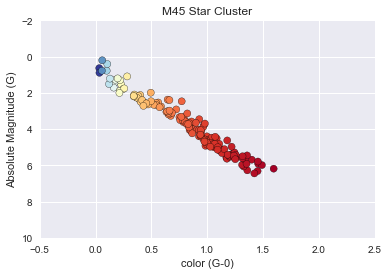

In [12]:
plt.clf()

import seaborn; seaborn.set()

cm = plt.cm.get_cmap("RdYlBu_r")# This is the colormap we'll use for our data points. Note: _r reverses the colormap
plt.scatter(u, absu, c= u, s=50, cmap=cm, norm=mpl.LogNorm(), edgecolor = 'black') 
plt.ylim(-2, 10)
plt.xlim(-0.5, 2.5)
#plt.yscale('log')
plt.xlabel('color (G-0)')
plt.ylabel('Absolute Magnitude (G)')
plt.title('M45 Star Cluster')
plt.gca().invert_yaxis() # This inverts the x axis so that the hottest stars are on the left.
plt.show()

### Coding Challenge 1: Add the sun to your color magnitude diagram

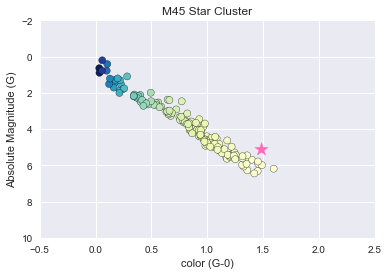

In [13]:
plt.clf()

cm = plt.cm.get_cmap("YlGnBu_r")# This is the colormap we'll use for our data points. Note: _r reverses the colormap
plt.scatter(u, absu, c= u, s=50, cmap=cm, norm=mpl.LogNorm(), edgecolor = 'black') 
plt.scatter( 5.12 - 3.64, 5.12, c='hotpink', s=200, marker='*')
plt.ylim(-2, 10)
plt.xlim(-0.5, 2.5)
#plt.yscale('log')
plt.xlabel('color (G-0)')
plt.ylabel('Absolute Magnitude (G)')
plt.title('M45 Star Cluster')
plt.gca().invert_yaxis() # This inverts the x axis so that the hottest stars are on the left.
plt.savefig('M45 star cluster absolute magnitude.png')
plt.show()


### Coding Challenge 2: Add a colormap to your diagram

### Coding Challenge 3: Create histograms for the absolute magnitude and color of your star cluster

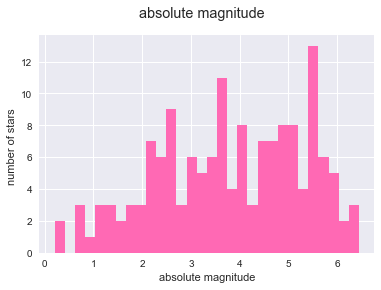

In [14]:
plt.hist (absu , 30 , color = 'hotpink')
plt.suptitle("absolute magnitude")
plt.xlabel(" absolute magnitude ")
plt.ylabel("number of stars ")

plt.savefig('absolute mag hist.png')
plt.show()

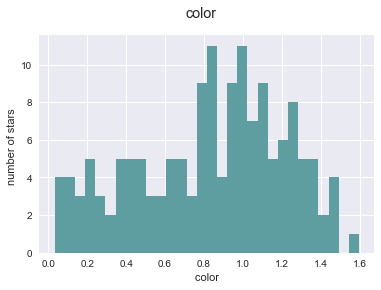

In [15]:
plt.hist (u , 30 , color = 'cadetblue')
plt.suptitle("color")
plt.xlabel(" color ")
plt.ylabel("number of stars ")

plt.savefig('color hist.png')
plt.show()